In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/netflix1.csv')

In [7]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


**Data Exploration**

In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [12]:
df_movies = df[df['type'] == 'Movie']
df_series = df[df['type'] == 'TV Show']
print(df_movies.shape)
print(df_series.shape)

(6126, 10)
(2664, 10)


In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.sample()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
857,s777,Movie,American Outlaws,Les Mayfield,United States,2021-06-02,2001,PG-13,94 min,Action & Adventure


In [14]:
df_movies = df_movies.drop(['show_id', 'type'], axis = 1)
df_movies['movie_duration'] = df_movies['duration'].str.extract('(\d+)').astype(int)
df_movies = df_movies[df_movies['movie_duration']>=60]

**Data Visualization**

/tmp/ipython-input-2553408298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_movies, palette='magma')


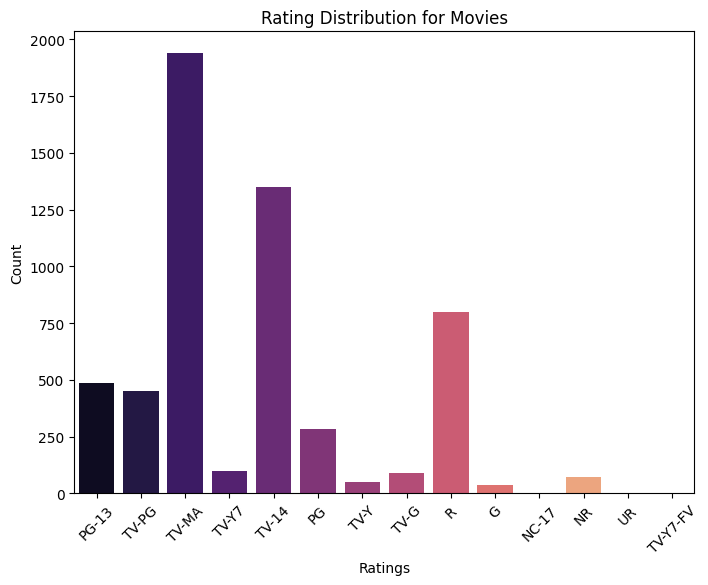

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_movies, palette='magma')
plt.title('Rating Distribution for Movies')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
df_movies.head()

,title,director,country,date_added,release_year,rating,duration,listed_in,movie_duration
0,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90
3,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
6,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas",104
7,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",87


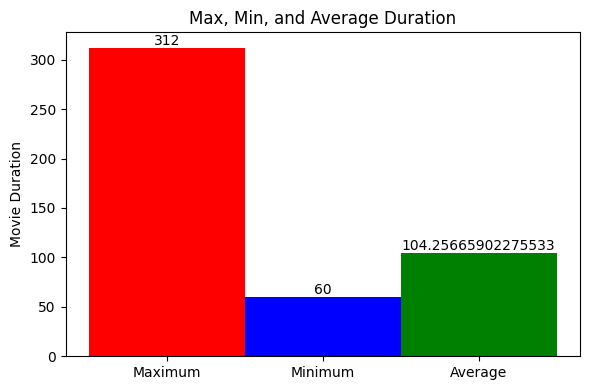

(5669, 9)

In [17]:
max_val = df_movies['movie_duration'].max()
min_val = df_movies['movie_duration'].min()
avg_val = df_movies['movie_duration'].mean()
labels = ['Maximum', 'Minimum', 'Average']
values = [max_val, min_val, avg_val]
plt.figure(figsize=(6, 4))
plt.bar(labels, values, color=['red', 'blue', 'green'],width = 1)
plt.title('Max, Min, and Average Duration')
plt.ylabel('Movie Duration')
plt.text(0, max_val, str(max_val), ha='center', va='bottom')
plt.text(1, min_val, str(min_val), ha='center', va='bottom')
plt.text(2, avg_val, str(avg_val), ha='center', va='bottom')
plt.tight_layout()
plt.show()
df_movies.shape

In [18]:
df_movies['release_year'].value_counts()

,count
release_year,
2018,712
2017,702
2016,620
2019,567
2020,443
...,...
1959,1
1963,1
1966,1


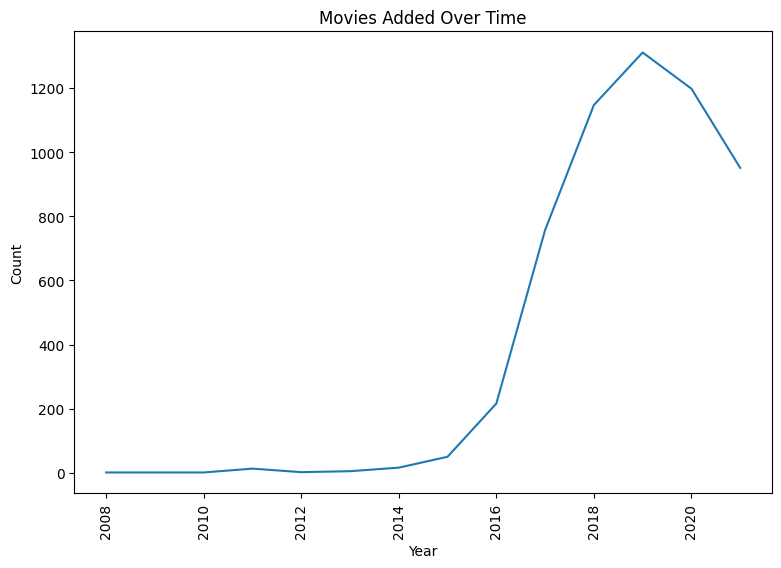

In [19]:
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'])
df_movies['year_added'] = df_movies['date_added'].dt.year
df_movies['month_added'] = df_movies['date_added'].dt.month
last_20years = df_movies['year_added'].value_counts().sort_index()
plt.figure(figsize=(9, 6))
plt.plot(last_20years.index, last_20years.values)
plt.title('Movies Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3441011764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.index, y=top_10_directors.values,


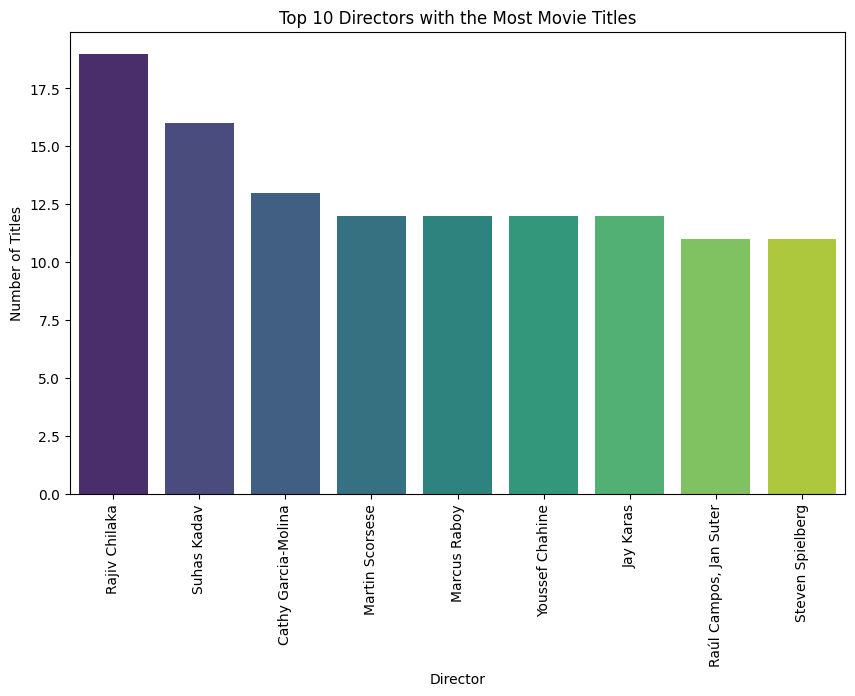

In [20]:
top_10_directors = df_movies['director'].value_counts().head(10).iloc[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.index, y=top_10_directors.values,
palette='viridis')
plt.title('Top 10 Directors with the Most Movie Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-3636959290.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index,


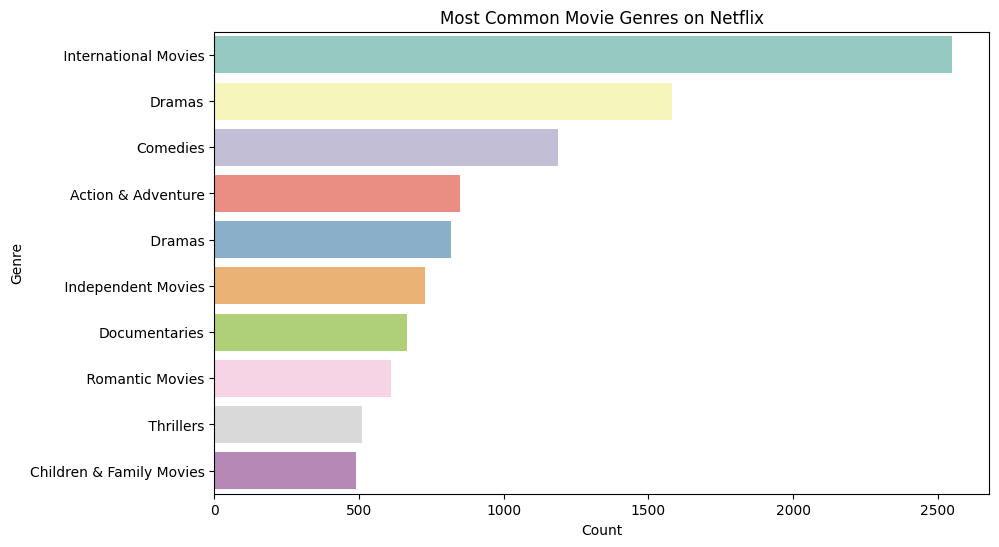

In [21]:
df_movies['movie_genres'] = df_movies['listed_in'].apply(lambda x: x.split(','))
all_movie_genres = sum(df_movies['movie_genres'],[])
genre_counts = pd.Series(all_movie_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette='Set3')
plt.title('Most Common Movie Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [22]:
df_movies.sample()

,title,director,country,date_added,release_year,rating,duration,listed_in,movie_duration,year_added,month_added,movie_genres
2007,One Day We'll Talk About Today,Angga Dwimas Sasongko,Indonesia,2020-05-23,2020,TV-G,128 min,"Dramas, International Movies",128,2020,5,"[Dramas, International Movies]"


/tmp/ipython-input-2564181727.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.index, y = top_countries.values, palette='viridis')


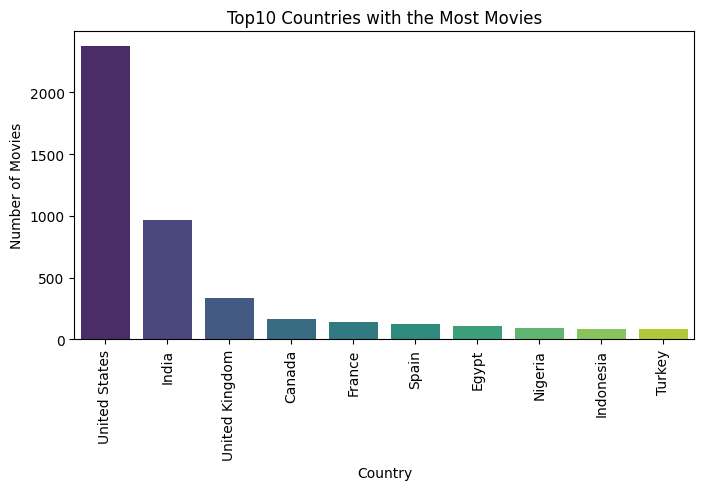

In [23]:
df_movies['country'] = df_movies['country'].replace({'Not Given': np.nan})
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'most_frequent')
df_movies['country'] = imp.fit_transform(df_movies[['country']]).ravel()
top_countries = df_movies['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x = top_countries.index, y = top_countries.values, palette='viridis')
plt.title('Top10 Countries with the Most Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation = 90)
plt.show()

In [24]:
df_series = df_series.drop(['show_id', 'type'], axis = 1)
df_series['Seasons'] = df_series['duration'].str.extract('(\d+)').astype(int)
df_series.sample()

,title,director,country,date_added,release_year,rating,duration,listed_in,Seasons
7430,Cinderella and the Four Knights,Not Given,South Korea,12/15/2019,2016,TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...",1


/tmp/ipython-input-2941884029.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_series, palette='magma')


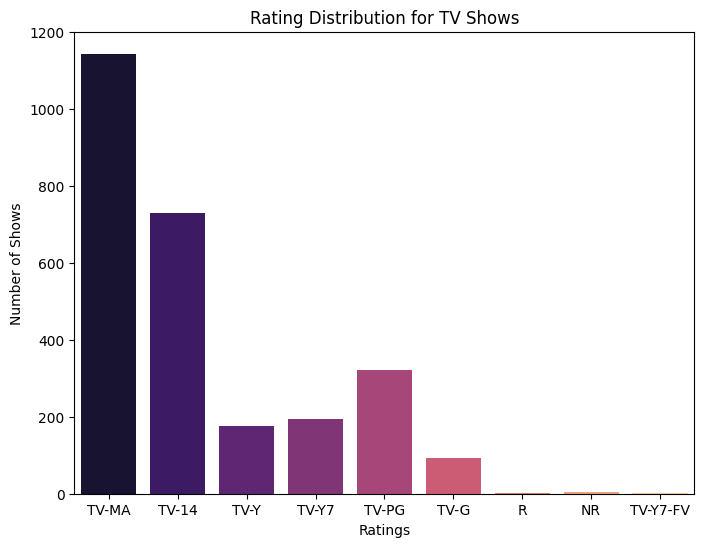

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_series, palette='magma')
plt.title('Rating Distribution for TV Shows')
plt.xlabel('Ratings')
plt.ylabel('Number of Shows')
plt.show()

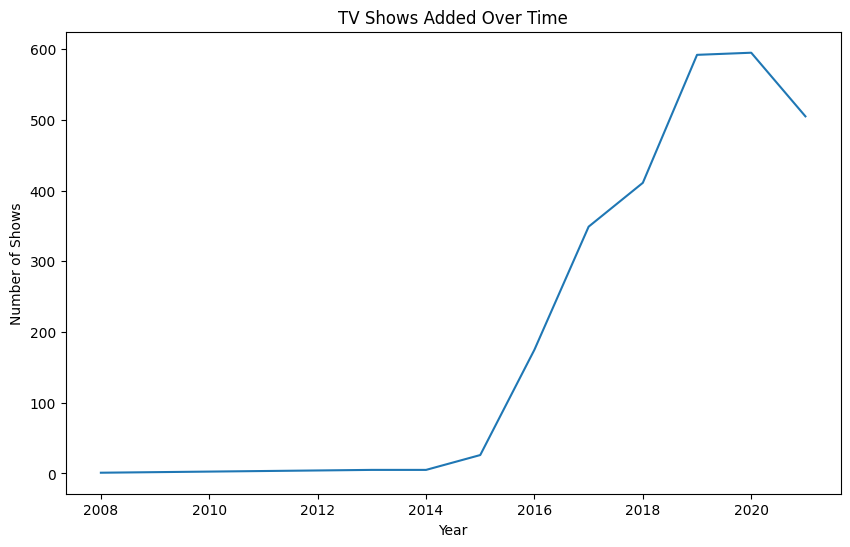

In [26]:
df_series['date_added'] = pd.to_datetime(df_series['date_added'])
df_series['year_added'] = df_series['date_added'].dt.year
df_series['month_added'] = df_series['date_added'].dt.month
series_count = df_series['year_added'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.plot(series_count.index, series_count.values)
plt.title('TV Shows Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows')
plt.show()

/tmp/ipython-input-3430304247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sgenre_count.values, y=sgenre_count.index,


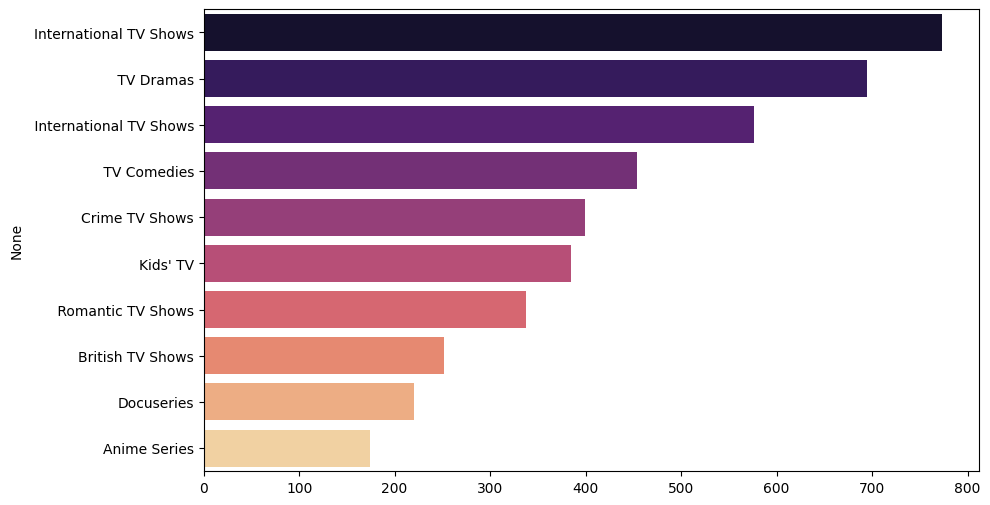

In [27]:
df_series['series_genres'] = df_series['listed_in'].apply(lambda x: x.split(','))
all_series_genres = sum(df_series['series_genres'], [])
sgenre_count = pd.Series(all_series_genres).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=sgenre_count.values, y=sgenre_count.index,
palette='magma')
plt.show()

/tmp/ipython-input-3952029702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_series_directors.index, y=top_series_directors.values,


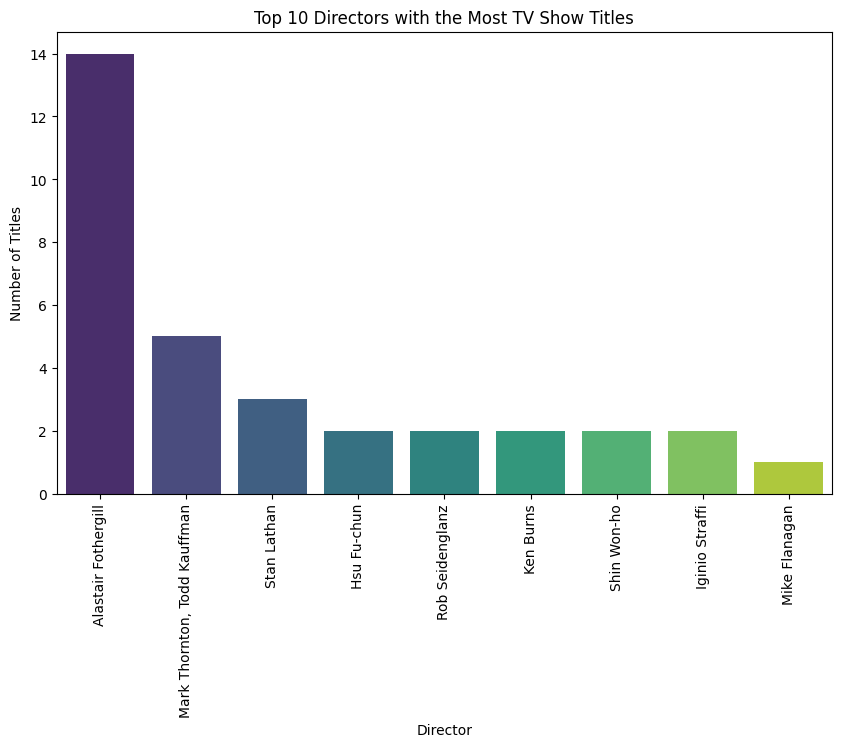

In [28]:
top_series_directors = df_series['director'].value_counts().head(10).iloc[1:]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_series_directors.index, y=top_series_directors.values,
palette='viridis')
plt.title('Top 10 Directors with the Most TV Show Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-1632020699.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = tops_countries.index, y = tops_countries.values, palette='viridis')


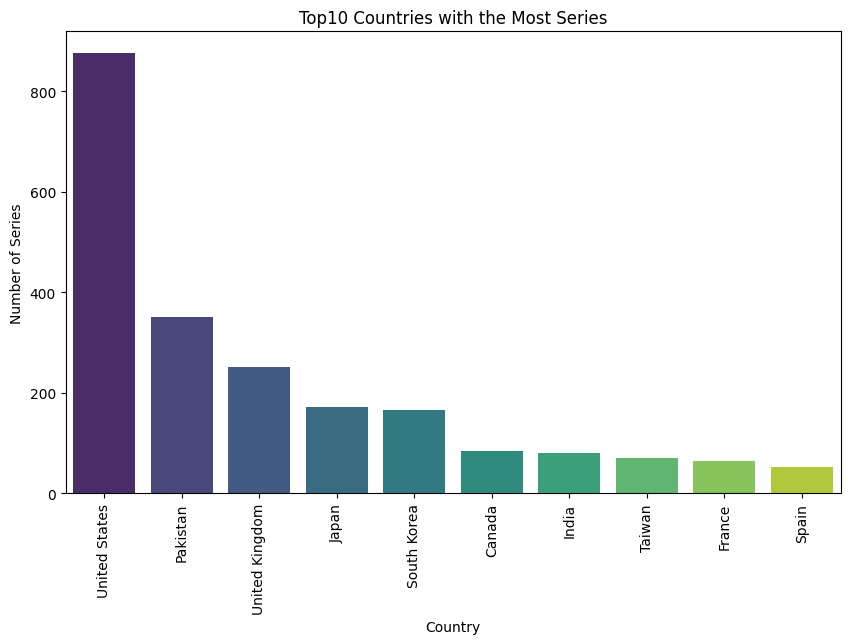

In [29]:
df_series['country'] = df_series['country'].replace({'Not Given': np.nan})
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'most_frequent')
df_series['country'] = imp.fit_transform(df_series[['country']]).ravel()
tops_countries = df_series['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x = tops_countries.index, y = tops_countries.values, palette='viridis')
plt.title('Top10 Countries with the Most Series')
plt.xlabel('Country')
plt.ylabel('Number of Series')
plt.xticks(rotation = 90)
plt.show()

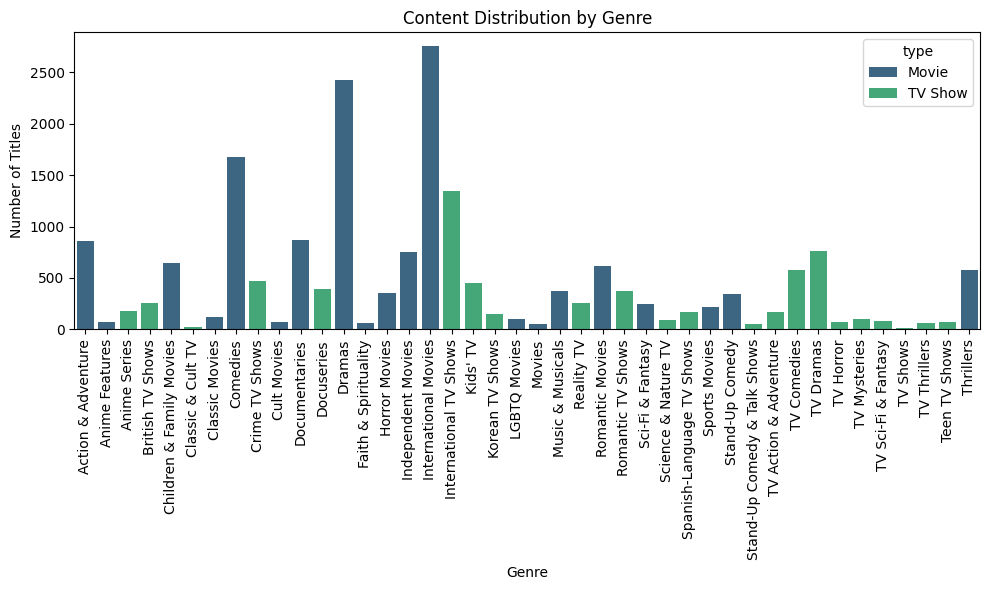

In [30]:
df['genres'] = df['listed_in'].apply(lambda x: x.split(','))
df['genres'] = df['genres'].apply(lambda genre_list: [g.strip() for g in genre_list])
df_exploded = df.explode('genres')
genre_comp = df_exploded.groupby(['genres', 'type']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_comp, x='genres', y='count', hue='type', palette='viridis')
plt.title('Content Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

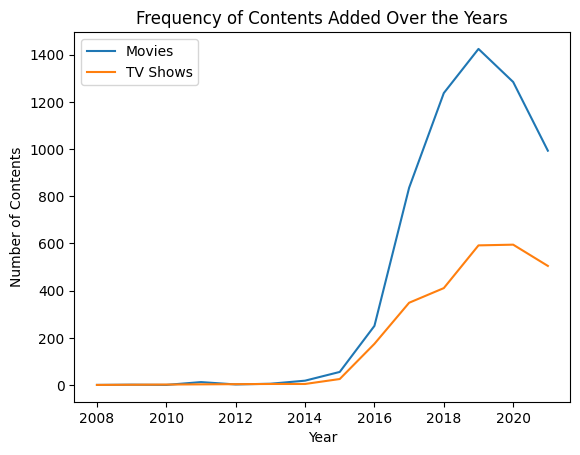

In [31]:
df['year'] = df['date_added'].dt.year
movie_releases = df[df['type']=='Movie']['year'].value_counts().sort_index()
series_releases = df[df['type']=='TV Show']['year'].value_counts().sort_index()

plt.plot(movie_releases.index, movie_releases.values, label = 'Movies')
plt.plot(series_releases.index, series_releases.values, label = 'TV Shows')
plt.title('Frequency of Contents Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Contents')
plt.legend()
plt.show()

In [32]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",2021


**Recommendation Model**

In [33]:
df['country'] = df['country'].replace({'Not Given': np.nan})
df['director'] = df['director'].replace({'Not Given': np.nan})
df[df['type']== 'TV Show']['director'] = df[df['type']== 'TV Show']['director'].fillna(df[df['type']== 'TV Show']['director'].mode()[0])
df[df['type']== 'TV Show']['country'] = df[df['type']== 'TV Show']['country'].fillna(df[df['type']== 'TV Show']['country'].mode()[0])
df[df['type']== 'Movie']['country'] = df[df['type']== 'Movie']['country'].fillna(df[df['type']== 'Movie']['country'].mode()[0])
df[df['type']== 'Movie']['cdirector'] = df[df['type']== 'Movie']['director'].fillna(df[df['type']== 'Movie']['director'].mode()[0])
df.head()

/tmp/ipython-input-622708836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['type']== 'TV Show']['director'] = df[df['type']== 'TV Show']['director'].fillna(df[df['type']== 'TV Show']['director'].mode()[0])
/tmp/ipython-input-622708836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['type']== 'TV Show']['country'] = df[df['type']== 'TV Show']['country'].fillna(df[df['type']== 'TV Show']['country'].mode()[0])
/tmp/ipython-input-622708836.py:5: SettingWithCopyWarning: 
A value is trying t

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International Mov...",2021


In [34]:
# type, title, director, country, release_year, genres
new_df = df[['type', 'title', 'director', 'country', 'release_year', 'listed_in']]
new_df.head()

,type,title,director,country,release_year,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,2021,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,1993,"Dramas, Independent Movies, International Movies"


In [35]:
new_df['listed_in'] = new_df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

/tmp/ipython-input-2289047349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['listed_in'] = new_df['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])


In [36]:
new_df['listed_in'][1]

['Crime TV Shows', 'International TV Shows', 'TV Action & Adventure']

In [37]:
new_df['director'] = new_df['director'].apply(lambda x: [x])
new_df['country'] = new_df['country'].apply(lambda x: [x])
new_df['release_year'] = new_df['release_year'].apply(lambda x: [str(x)])

/tmp/ipython-input-2563736546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['director'] = new_df['director'].apply(lambda x: [x])
/tmp/ipython-input-2563736546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['country'] = new_df['country'].apply(lambda x: [x])
/tmp/ipython-input-2563736546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [38]:
new_df['tag'] = new_df['director'] + new_df['country'] + new_df['release_year'] + new_df['listed_in']
new_df['tag'] = new_df['tag'].apply(lambda x: ' '.join([str(item) for item in x]))
new_df.head()

/tmp/ipython-input-1743007431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['director'] + new_df['country'] + new_df['release_year'] + new_df['listed_in']
/tmp/ipython-input-1743007431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tag'] = new_df['tag'].apply(lambda x: ' '.join([str(item) for item in x]))


,type,title,director,country,release_year,listed_in,tag
0,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[United States],[2020],[Documentaries],Kirsten Johnson United States 2020 Documentaries
1,TV Show,Ganglands,[Julien Leclercq],[France],[2021],"[Crime TV Shows, International TV Shows, TV Ac...",Julien Leclercq France 2021 Crime TV Shows Int...
2,TV Show,Midnight Mass,[Mike Flanagan],[United States],[2021],"[TV Dramas, TV Horror, TV Mysteries]",Mike Flanagan United States 2021 TV Dramas TV ...
3,Movie,Confessions of an Invisible Girl,[Bruno Garotti],[Brazil],[2021],"[Children & Family Movies, Comedies]",Bruno Garotti Brazil 2021 Children & Family Mo...
4,Movie,Sankofa,[Haile Gerima],[United States],[1993],"[Dramas, Independent Movies, International Mov...",Haile Gerima United States 1993 Dramas Indepen...


In [39]:
new_df = new_df[['type', 'title', 'tag']]

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import  cosine_similarity
cv = CountVectorizer(max_features = 5000)
vectors = cv.fit_transform(new_df['tag']).toarray()
similarity = cosine_similarity(vectors)

In [41]:
def recommend(title):
  idx = new_df[new_df['title']==title].index[0]
  distance = similarity[idx]
  recommended_list = sorted(list(enumerate(distance)), reverse = True, key = lambda x:x[1])[1:6]
  for i in recommended_list:
    print(new_df.iloc[i[0]].title)

In [43]:
recommend('Ganglands')

Lupin
Dealer
Crime Time
Bangkok Breaking
The Eagle of El-Se'eed
